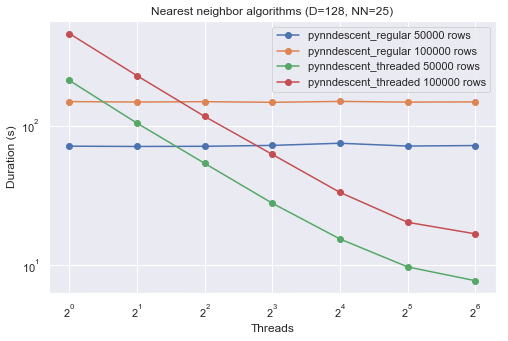

In [2]:
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [8, 5]
import seaborn; seaborn.set()

results = pd.read_csv('results/results_20190307.csv')

for algorithm, rows in (('pynndescent_regular', 50000), ('pynndescent_regular', 100000), ('pynndescent_threaded', 50000), ('pynndescent_threaded', 100000)):
    results_subset = results[(results['algorithm'] == algorithm) & (results['rows'] == rows)][['threads','duration']]
    plt.loglog('threads', 'duration', data=results_subset, marker='o', label='{} {} rows'.format(algorithm, rows), basex=2)

plt.title("Nearest neighbor algorithms (D=128, NN=25)")
plt.xlabel('Threads')
plt.ylabel('Duration (s)')
plt.legend()

The first thing to notice is that the regular version of `pynndescent` is not multi-threaded: it can't take advantage of additional threads in any meaningful way.

The threaded version gets faster with additional threads, but it's only faster than the regular version with 4 or more threads.

In [3]:
x = results[(results['algorithm'] == 'pynndescent_regular') & (results['threads'] == 1) & (results['rows'] == 50000)]['duration']
single_core_multiplier = x.tolist()[0] / 50000
results['speedup'] = single_core_multiplier * results['rows'] / results['duration']

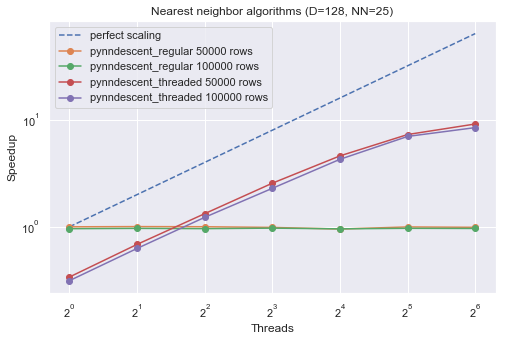

In [4]:
plt.loglog([1, 64], [1, 64], '--', label='perfect scaling')
for algorithm, rows in (('pynndescent_regular', 50000), ('pynndescent_regular', 100000), ('pynndescent_threaded', 50000), ('pynndescent_threaded', 100000)):
    results_subset = results[(results['algorithm'] == algorithm) & (results['rows'] == rows)][['threads','speedup']]
    plt.loglog('threads', 'speedup', data=results_subset, marker='o', label='{} {} rows'.format(algorithm, rows), basex=2)

plt.title("Nearest neighbor algorithms (D=128, NN=25)")
plt.xlabel('Threads')
plt.ylabel('Speedup')
plt.legend()

This graph shows the speedup that additional threads give. The regular version of `pynndescent` has no speedup, so the curve is flat.

The threaded version has beats the regular version for 4 or more threads, but the speedup seems to be sublinear. It would be interesting to try more threads.

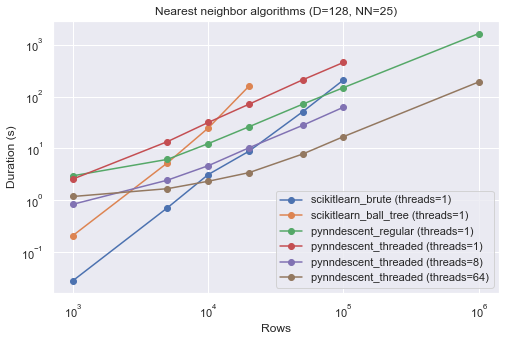

In [5]:
results = pd.read_csv('results/results_20190307.csv')

for algorithm, threads in (('scikitlearn_brute', 1), ('scikitlearn_ball_tree', 1), ('pynndescent_regular', 1), ('pynndescent_threaded', 1), ('pynndescent_threaded', 8), ('pynndescent_threaded', 64)):
    results_subset = results[(results['algorithm'] == algorithm) & (results['threads'] == threads)][['rows','duration']]
    plt.loglog('rows', 'duration', data=results_subset, marker='o', label='{} (threads={})'.format(algorithm, threads))

plt.title("Nearest neighbor algorithms (D=128, NN=25)")
plt.xlabel('Rows')
plt.ylabel('Duration (s)')
plt.legend()

This graph shows how the processing time scales with the number of rows in the dataset. The scikit-learn implementations (brute force and ball tree) both scale poorly compared to `pynndescent`.